In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import os
from matplotlib.ticker import FuncFormatter

In [2]:
# Load data
# Save all csv files names
all_df_name = pd.Series(os.listdir("/Users/faezehmirlohi/Desktop/UCSF/Assignments/Fall/DATASCI217/Assignment7/07-visualization-FaezehMirlohi/ddf--datapoints--population--by--country--age--gender--year/"))

# Extract country names from file names
country = all_df_name.str.extract(r"country-([\w]+)--age")
country.columns = ["country_name"]

# Save all csv paths 
country['file_path'] = "/Users/faezehmirlohi/Desktop/UCSF/Assignments/Fall/DATASCI217/Assignment7/07-visualization-FaezehMirlohi/ddf--datapoints--population--by--country--age--gender--year/" + all_df_name.values

# data (dict) = {country_name (key): file_path (value)}
data = {row['country_name']: pd.read_csv(row['file_path']) for _, row in country.iterrows()}

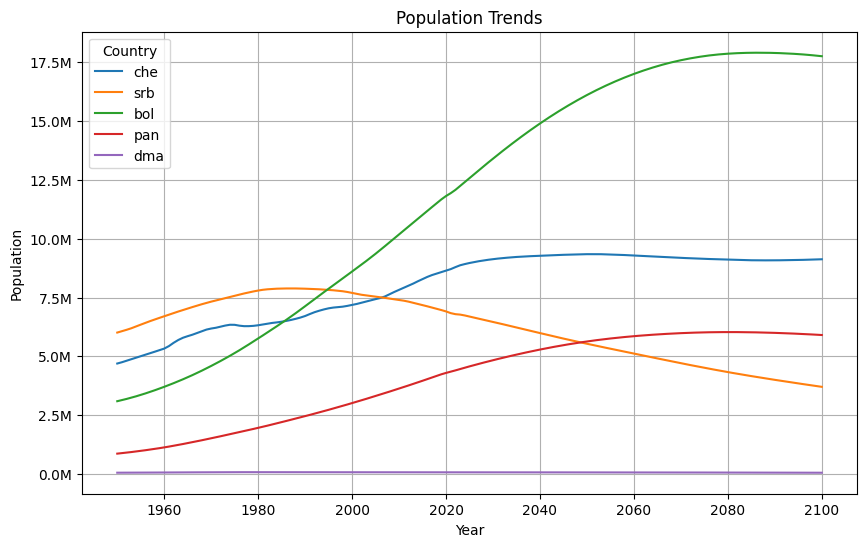

In [3]:
# Part 1.1

# Colormap
colors = cm.tab10.colors

# Set figure size 
plt.figure(figsize=(10, 6))

# Define millions function to display y axis unit better
def millions(x, pos):
    # Devide the value by 1,000,000 and show only 1 decimal
    # Add the "M" suffix to indicate millions
    return f'{x * 1e-6:.1f}M' 

# Lineplot
for i, cty in enumerate(country.loc[0:4, "country_name"]):

    # Total population by each year
    yearly_total = data[cty].groupby('year')['population'].sum()

    # Lineplot of population trends of all 5 countries
    plt.plot(yearly_total.index, yearly_total, linestyle = '-', label=cty, 
             color = colors[i % len(colors)])

# Plot design    
plt.legend(title="Country")
plt.grid()
plt.title('Population Trends')
plt.xlabel('Year')
plt.ylabel('Population')
# Custume format the y axis tick values
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))
# Display plot
plt.show()

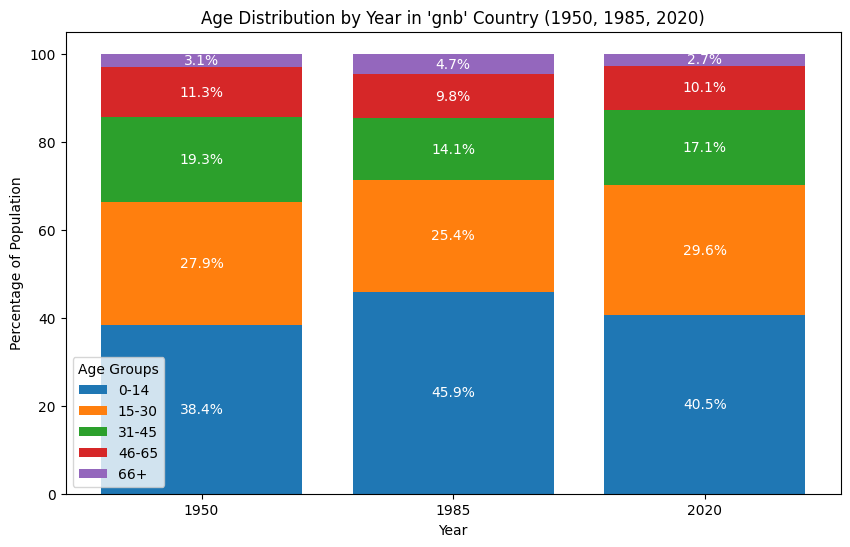

In [4]:
# Part 1.2

# Set figure size and plot
fig, ax = plt.subplots(figsize=(10, 6))

# Years to compare
years= [1950, 1985, 2020]

# Set up positions for the bars to avoid extra space
positions = [0, 1, 2]

# Define age groups
age_bins = [-1, 14, 30, 45, 65, 200]
age_labels = ['0-14', '15-30', '31-45', '46-65', '66+']

# Select 1 country to see the trends in 
df = data[country.loc[country.index[-1], "country_name"]]
df_filtered = df[df['year'].isin(years)].copy()

# Bin the ages into groups and save it in a new column
df_filtered['age_group'] = pd.cut(df_filtered['age'], bins=age_bins, labels=age_labels, right=True)

# Aggregate population by year and age group
age_distribution = df_filtered.groupby(['year', 'age_group'], observed=True)['population'].sum().reset_index()
# Calculate the total population per year and save it in a new column
age_distribution['total_population_year'] = age_distribution.groupby('year')['population'].transform('sum')
# Calculate the percentage for each age group in each year
age_distribution['percentage'] = (age_distribution['population'] / age_distribution['total_population_year']) * 100

# Loop through each year and age-group to draw a bar for it
for i, year in enumerate(age_distribution['year'].unique()):

    # Bottom of each bar
    bottom = 0

    for j, age in enumerate(age_distribution['age_group'].unique()):

        # Percentage of the population within this year and age group
        value = age_distribution.loc[(age_distribution['age_group'] == age) & (age_distribution['year'] == year),'percentage'].values
        # Draw the bar 
        ax.bar(i + 1, age_distribution.loc[(age_distribution['age_group'] == age) & (age_distribution['year'] == year),'percentage'], bottom = bottom, color = colors[j % len(colors)])
        # Write the percentage inside the bar
        ax.text(i + 1, bottom + value / 2, f'{value[0]:.1f}%', ha='center', va='center', color='white', fontsize=10)
        # change the bottom value to stack the next bar on toop of this bar
        bottom += age_distribution.loc[(age_distribution['age_group'] == age) & (age_distribution['year'] == year),'percentage'].values


# Labels, title, and legend
ax.set_xticks([1,2,3])
ax.set_xticklabels(years)
ax.set_title("Age Distribution by Year in 'gnb' Country (1950, 1985, 2020)")
ax.set_xlabel('Year')
ax.set_ylabel('Percentage of Population')
ax.legend(age_labels, title='Age Groups')

# Display
plt.show()

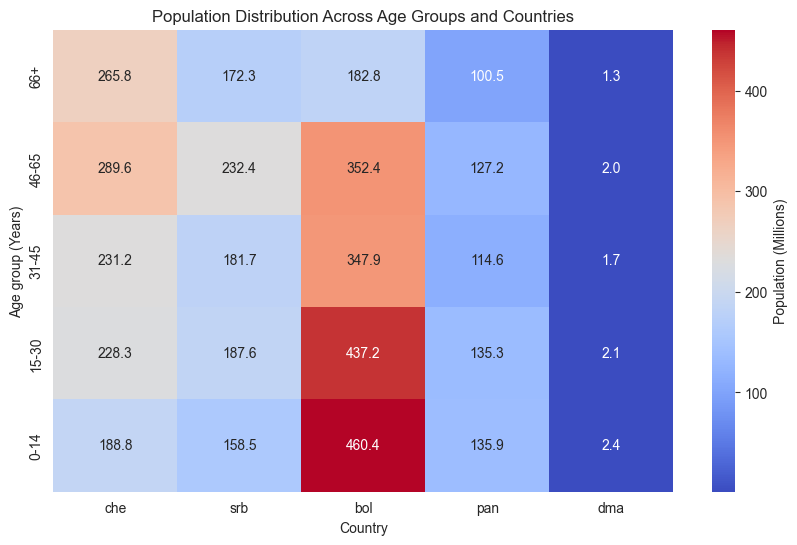

In [5]:
# Part 2.1
sns.set_style("whitegrid")

# Set figure size 
plt.figure(figsize=(10, 6))

# Dictionary with age groups population of all 5 countries 
population_distribution = {}

for cty in country.loc[0:4, "country_name"]:
    # Bin the age by groups and save in a new column
    data[cty]['age_group'] = pd.cut(data[cty]['age'], bins = age_bins, labels = age_labels, right = True)

    # Populstion of each age group
    age_group_population = data[cty].groupby('age_group', observed=True)['population'].sum()
    population_distribution[cty] = age_group_population

# Convert the dictionary to dataframe to pass it to the heatmap
population_df = pd.DataFrame(population_distribution)

# Heatmap of population across age groups and countries 
sns.heatmap(population_df.iloc[::-1]/1e6, annot=True, fmt=".1f", cmap='coolwarm', cbar_kws={'label': 'Population (Millions)'})

# Plot design
plt.title('Population Distribution Across Age Groups and Countries')
plt.xlabel('Country')
plt.ylabel('Age group (Years)')

# Display
plt.show()

***Population Heatmap Across Age Groups and 5 Countires***

- The plot shows that 'dma' and 'pan' countries have a similar population distribution among all age groups.
- While the majority of 'bol' country population seems to be young (population decreases by age), the mojarity of 'che' seems to be of older ages (population increases by age).

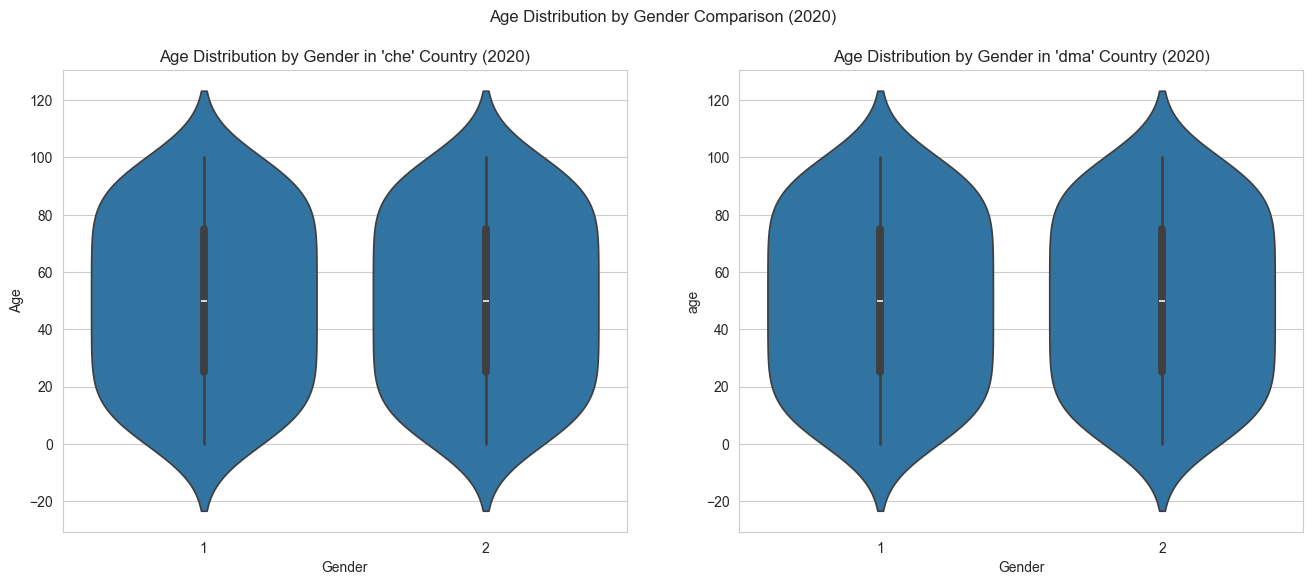

In [6]:
# Part 2.2

# Filter data for 2020 for each country
che_2020 = data['che'][data['che']['year'] == 2020]
dma_2020 = data['dma'][data['dma']['year'] == 2020]

# Create side by side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6),)

# Plot for 'che'
sns.violinplot(data=che_2020, x='gender', y='age', ax=axes[0])
axes[0].set_title("Age Distribution by Gender in 'che' Country (2020)")
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Age')

# Plot for 'dma'
sns.violinplot(data=dma_2020, x='gender', y='age', ax=axes[1])
axes[1].set_title("Age Distribution by Gender in 'dma' Country (2020)")
axes[1].set_xlabel('Gender')

# Display the plot
plt.suptitle('Age Distribution by Gender Comparison (2020)')
plt.show()


***Side-By-Side Violinplots of Age Distribution By Gender in 'che' and 'dma' Countries***
- The distribution of afe between both gender are the same in both countries.
- Both countries seems to have the same age distribution by gender in year 2020.

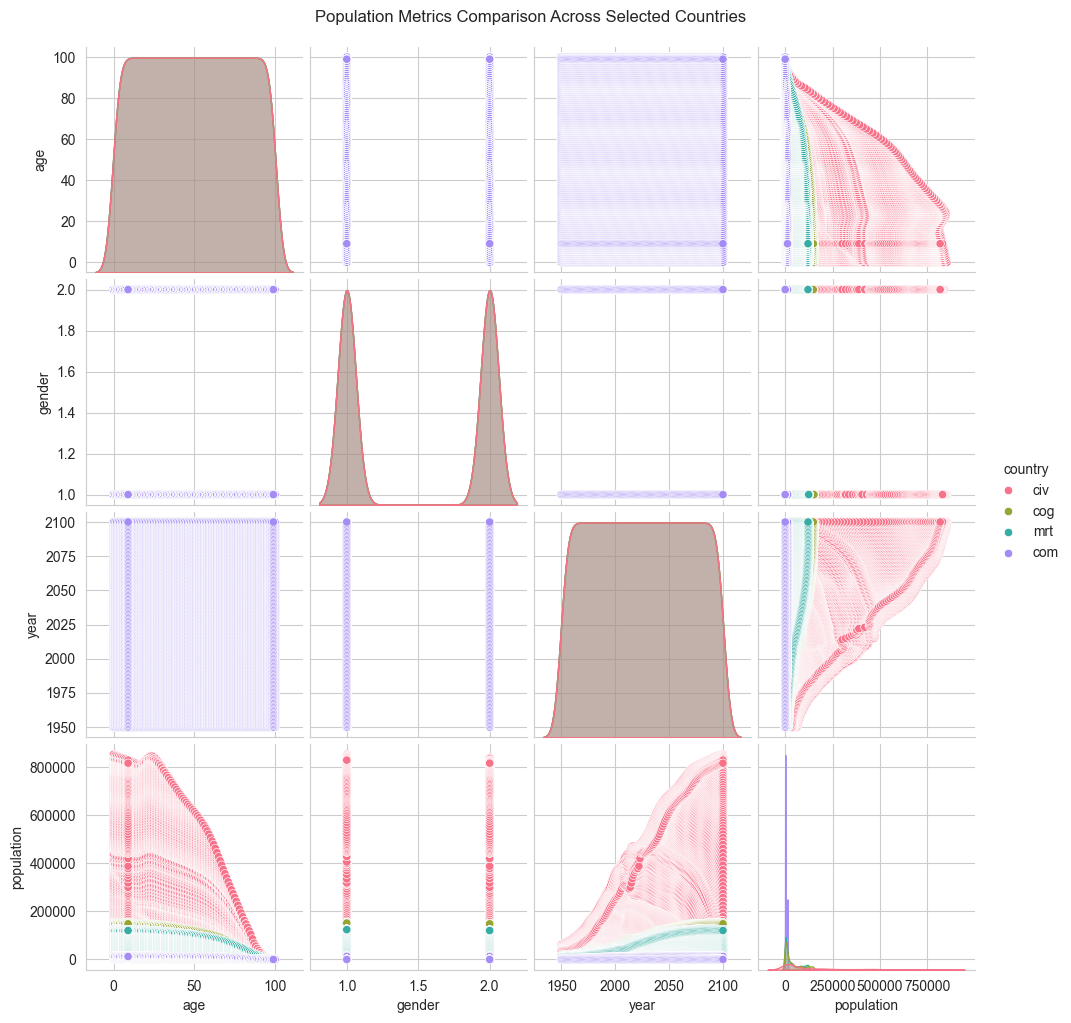

In [7]:
# Part 2.3

# Select 4 countries to compare
countries = country.loc[13:16, 'country_name'].tolist()
# Make a dataframe from concatanating all 4 dataframes
selected_data = pd.concat([data[cty] for cty in countries])

# PairPlot (each country has a different color)
sns.pairplot(selected_data, hue = 'country', palette=sns.color_palette("husl", 4))
plt.suptitle('Population Metrics Comparison Across Selected Countries', y=1.02)
plt.show()

***PairPlot of all variables for 4 countries***
- All countries population decreases by age except in 'com' country (semms to have a steady population across all ages).
- All countries population increases by time (untill 2100) except in 'com' country (semms to have a steady population).